# Exercise 4

In [1]:
import pandas as pd

### Read dataset 

In [3]:
df=pd.read_csv("https://raw.githubusercontent.com/tuyenhavan/Course_Data/main/birthweight_reduced.csv")
df.head()

,id,headcirumference,length,Birthweight,Gestation,smoker,motherage,mnocig,mheight,mppwt,fage,fedyrs,fnocig,fheight,lowbwt,mage35,LowBirthWeight
0,1313,12,17,5.8,33,0,24,0,58,99,26,16,0,66,1,0,Low
1,431,12,19,4.2,33,1,20,7,63,109,20,10,35,71,1,0,Low
2,808,13,19,6.4,34,0,26,0,65,140,25,12,25,69,0,0,Normal
3,300,12,18,4.5,35,1,41,7,65,125,37,14,25,68,1,1,Low
4,516,13,18,5.8,35,1,20,35,67,125,23,12,50,73,1,0,Low


In [4]:
df=df.iloc[:, 1:len(df.columns)]
df.head()

,headcirumference,length,Birthweight,Gestation,smoker,motherage,mnocig,mheight,mppwt,fage,fedyrs,fnocig,fheight,lowbwt,mage35,LowBirthWeight
0,12,17,5.8,33,0,24,0,58,99,26,16,0,66,1,0,Low
1,12,19,4.2,33,1,20,7,63,109,20,10,35,71,1,0,Low
2,13,19,6.4,34,0,26,0,65,140,25,12,25,69,0,0,Normal
3,12,18,4.5,35,1,41,7,65,125,37,14,25,68,1,1,Low
4,13,18,5.8,35,1,20,35,67,125,23,12,50,73,1,0,Low


### Feature and target preparation

In [9]:
X=df.iloc[:,0:15]
#X=df[listName]
y=df["LowBirthWeight"]

### Train and test split

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test,y_train,y_test=train_test_split(X, y, test_size=0.25, random_state=42)

### Building a logistic regression

In [11]:
from sklearn.linear_model import LogisticRegression

logitModel=LogisticRegression(solver="saga")
logitModel.fit(X_train,y_train.values.ravel())

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


LogisticRegression(solver='saga')

In [12]:
y_train.values.ravel()

array(['Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Low', 'Normal', 'Normal', 'Normal', 'Normal',
       'Low', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Low',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Low', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal'], dtype=object)

In [14]:
# Obtain model parameters
logitModel.intercept_
logitModel.coef_

array([[ 0.00329449,  0.00920462,  0.023386  ,  0.02659232, -0.00380481,
        -0.04877642,  0.02921026, -0.02372326,  0.06725188,  0.0063326 ,
        -0.00906734, -0.0564312 , -0.06127018, -0.01269475, -0.00305666]])

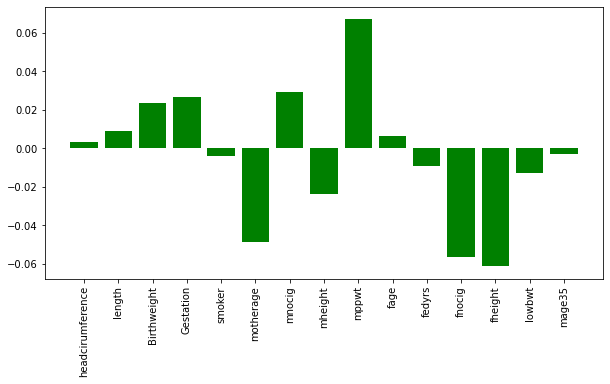

In [16]:
# Create a pandas series of model coefficients
coefParam=pd.Series(logitModel.coef_[0])
# Create a pandas series of column names
featNames=pd.Series(X.columns)
# Visualize feature coeficients
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.bar(featNames, coefParam, color="g")
plt.xticks(rotation="vertical")
plt.show()

### Make prediction based on X_test

In [131]:
y_pred=logitModel.predict(X_test)
y_pred

array(['Normal', 'Normal', 'Normal', 'Low', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal'], dtype=object)

### Model accuracy

In [132]:
# OverallAccuracy of the model
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7272727272727273

## Feature Selection

#### Using SelectKBest

In [120]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [121]:
# Initialize the SelectKBest
bestFeature=SelectKBest(score_func=chi2, k="all")

bestFeature.fit(X,y)
# Create a dataframe containing the feature names and score for each feature
dfFeature=pd.DataFrame({"Feature":X.columns,"Scores":bestFeature.scores_})
dfFeature=dfFeature.sort_values(by=["Scores"])
dfFeature.reset_index(drop=True, inplace=True)
dfFeature

,Feature,Scores
0,fheight,0.053892
1,mheight,0.166605
2,motherage,0.300715
3,mage35,0.375000
4,headcirumference,0.455117
5,fedyrs,0.512195
6,mnocig,0.852273
7,length,0.893867
8,smoker,1.280303
9,Gestation,2.657351


In [122]:
# Select all features 
listName=[dfFeature.Feature[x] for x in range(len(dfFeature)) if dfFeature.Scores[x]>0.5]

In [123]:
listName

['fedyrs',
 'mnocig',
 'length',
 'smoker',
 'Gestation',
 'fage',
 'Birthweight',
 'mppwt',
 'lowbwt',
 'fnocig']

##### Using Extra Tree Regressor

In [34]:
from sklearn.ensemble import ExtraTreesClassifier

In [35]:
bestFeature=ExtraTreesClassifier()
bestFeature.fit(X,y)

ExtraTreesClassifier()

In [41]:
# Get feature importance
score=bestFeature.feature_importances_

df_score=pd.DataFrame({"Features": X.columns, "Scores":score})
# Sort values by score
df_score=df_score.sort_values(by="Scores")

df_score.reset_index(drop=True, inplace=True)
df_score

,Features,Scores
0,mage35,0.001768
1,fage,0.014787
2,mnocig,0.015617
3,fedyrs,0.015668
4,mheight,0.016233
5,smoker,0.016721
6,mppwt,0.016825
7,motherage,0.024889
8,fheight,0.027312
9,fnocig,0.030947


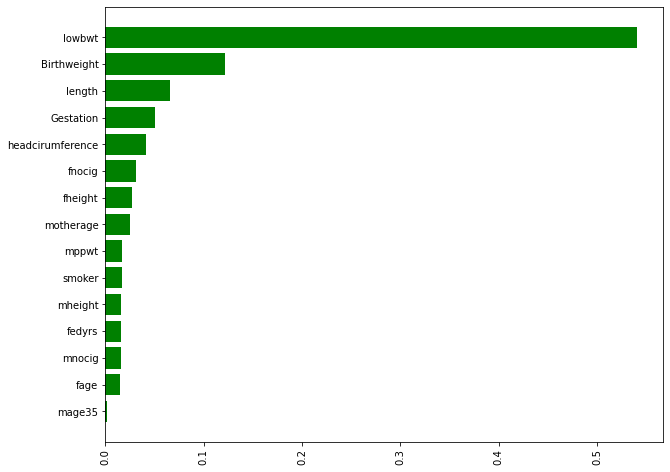

In [56]:
# Visualization
plt.figure(figsize=(10,8))
plt.barh(df_score.Features, df_score.Scores, color="g")
plt.xticks(rotation="vertical")
plt.show()

# Exercise 3 

In [ ]:
# Import data 
df=pd.read_csv()